In [1]:
import pandas as pd
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot

import warnings
warnings.filterwarnings('ignore')

vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [3]:
list_dfs = []

list_files = os.listdir("../../results/results_training_activity/")

for element in list_files:
    df_data = pd.read_csv(f"../../results/results_training_activity/{element}")
    values_in_name = element.split("_exploring_")
    encoder = values_in_name[0]
    iteration = values_in_name[-1].replace(".csv", "")

    df_data["encoder"] = encoder
    list_dfs.append(df_data)

df_exploring = pd.concat(list_dfs, axis=0)
df_exploring

,description,r2_value,mean_abs_error_value,mean_square_error_value,fit_time,score_time,test_max_error,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_median_absolute_error,test_neg_root_mean_squared_error,test_r2,iteration,encoder
0,KernelRidge,1.564015e-01,2.141952e-01,2.528385e-01,0.626703,0.057061,-7.344790e-01,-2.110593e-01,-6.338658e-02,-1.997295e-01,-2.517145e-01,1.579715e-01,5,Group_6
1,GaussianProcessRegressor,-1.380352e+00,3.348881e-01,4.247133e-01,4.948756,1.690532,-7.431392e-01,-3.322339e-01,-1.791583e-01,-2.703425e-01,-4.232209e-01,-1.379869e+00,5,Group_6
2,BayesianRidge,2.002918e-01,2.140874e-01,2.461734e-01,0.139886,0.003907,-5.975838e-01,-2.113246e-01,-5.928092e-02,-2.112494e-01,-2.434618e-01,2.126448e-01,5,Group_6
3,TweedieRegressor,1.859039e-01,2.128083e-01,2.483780e-01,0.057560,0.003834,-6.694701e-01,-2.094533e-01,-6.065354e-02,-2.024377e-01,-2.462549e-01,1.943634e-01,5,Group_6
4,SGDRegressor,-2.677148e+29,1.374041e+14,1.424333e+14,0.111288,0.003946,-3.743810e+14,-1.992840e+14,-4.682276e+28,-1.990810e+14,-2.022213e+14,-6.289852e+29,5,Group_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,BaggingRegressor,2.177448e-01,1.684342e-01,2.413406e-01,4.971881,0.025624,-7.425114e-01,-1.648494e-01,-5.186988e-02,-1.098619e-01,-2.277177e-01,3.165114e-01,18,Group_0
12,DecisionTreeRegressor,5.098954e-02,1.846061e-01,2.658224e-01,0.942372,0.006874,-7.768353e-01,-1.829649e-01,-7.049709e-02,-1.003249e-01,-2.654684e-01,7.134189e-02,18,Group_0
13,SVR,1.729228e-01,2.213416e-01,2.481585e-01,4.528910,1.163448,-4.973628e-01,-2.288712e-01,-6.452866e-02,-2.393465e-01,-2.540165e-01,1.498100e-01,18,Group_0
14,KNeighborsRegressor,3.898123e-01,1.601347e-01,2.131512e-01,0.009949,0.083218,-6.975266e-01,-1.711832e-01,-5.041481e-02,-1.322984e-01,-2.244562e-01,3.356747e-01,18,Group_0


In [9]:
df_exploring_validating = df_exploring[["description", "r2_value", "mean_abs_error_value", "mean_square_error_value", "iteration", "encoder"]]
df_exploring_validating["stage"] = "Validation"
df_exploring_validating = df_exploring_validating[df_exploring_validating["r2_value"]>0]
df_exploring_validating

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
0,KernelRidge,0.156401,0.214195,0.252838,5,Group_6,Validation
2,BayesianRidge,0.200292,0.214087,0.246173,5,Group_6,Validation
3,TweedieRegressor,0.185904,0.212808,0.248378,5,Group_6,Validation
6,GradientBoostingRegressor,0.108020,0.237956,0.259988,5,Group_6,Validation
8,AdaBoostRegressor,0.006202,0.251700,0.274425,5,Group_6,Validation
...,...,...,...,...,...,...,...
11,BaggingRegressor,0.217745,0.168434,0.241341,18,Group_0,Validation
12,DecisionTreeRegressor,0.050990,0.184606,0.265822,18,Group_0,Validation
13,SVR,0.172923,0.221342,0.248159,18,Group_0,Validation
14,KNeighborsRegressor,0.389812,0.160135,0.213151,18,Group_0,Validation


In [10]:
df_exploring_training = df_exploring[["description", 'test_r2', "iteration", "encoder"]]
df_exploring_training.columns = ["description", 'r2_value', "iteration", "encoder"]
df_exploring_training["stage"] = "Training"
df_exploring_training = df_exploring_training[df_exploring_training["r2_value"]>0]
df_exploring_training

,description,r2_value,iteration,encoder,stage
0,KernelRidge,0.157972,5,Group_6,Training
2,BayesianRidge,0.212645,5,Group_6,Training
3,TweedieRegressor,0.194363,5,Group_6,Training
6,GradientBoostingRegressor,0.114819,5,Group_6,Training
8,AdaBoostRegressor,0.006975,5,Group_6,Training
...,...,...,...,...,...
11,BaggingRegressor,0.316511,18,Group_0,Training
12,DecisionTreeRegressor,0.071342,18,Group_0,Training
13,SVR,0.149810,18,Group_0,Training
14,KNeighborsRegressor,0.335675,18,Group_0,Training


In [11]:
df_concat = pd.concat([df_exploring_training, df_exploring_validating], axis=0)
df_concat = df_concat[["description", "r2_value","iteration", "encoder", "stage"]]
df_concat

,description,r2_value,iteration,encoder,stage
0,KernelRidge,0.157972,5,Group_6,Training
2,BayesianRidge,0.212645,5,Group_6,Training
3,TweedieRegressor,0.194363,5,Group_6,Training
6,GradientBoostingRegressor,0.114819,5,Group_6,Training
8,AdaBoostRegressor,0.006975,5,Group_6,Training
...,...,...,...,...,...
11,BaggingRegressor,0.217745,18,Group_0,Validation
12,DecisionTreeRegressor,0.050990,18,Group_0,Validation
13,SVR,0.172923,18,Group_0,Validation
14,KNeighborsRegressor,0.389812,18,Group_0,Validation


<AxesSubplot: xlabel='r2_value', ylabel='encoder'>

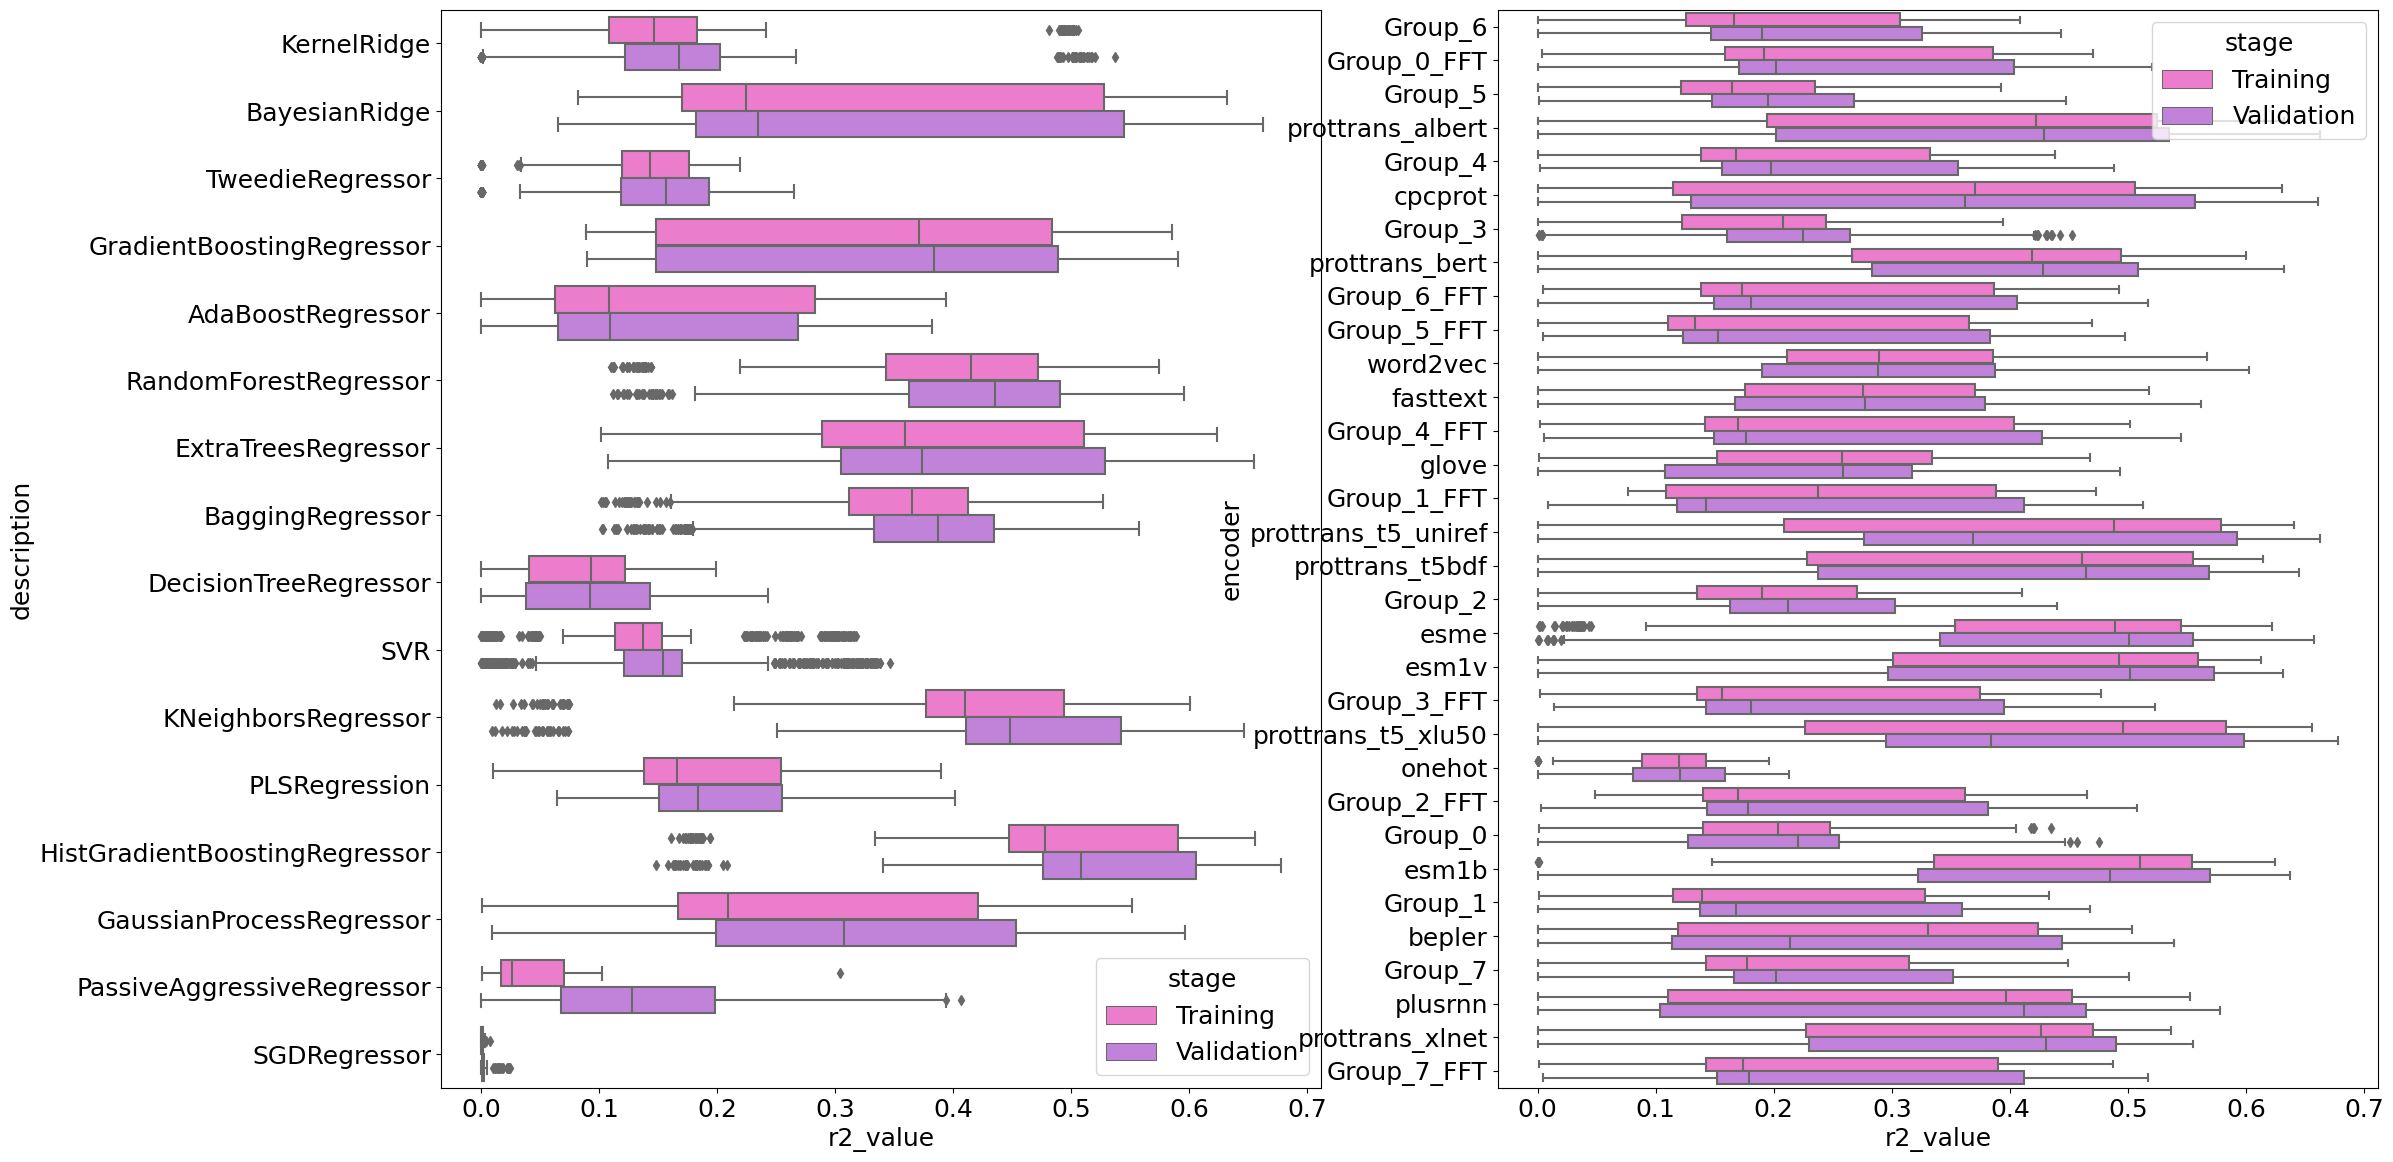

In [43]:
fig, axes = plt.subplots(1,2, figsize=(25,14))

sns.boxplot(ax=axes[0], data=df_concat, x="r2_value", hue="stage", y="description")
sns.boxplot(ax=axes[1], data=df_concat, x="r2_value", hue="stage", y="encoder")

In [44]:
df_exploring_training.sort_values(by="r2_value", ascending=False)

,description,r2_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,6.556096e-01,10,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.445757e-01,17,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.441517e-01,1,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.423972e-01,13,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.410752e-01,13,prottrans_t5_uniref,Training
...,...,...,...,...,...
0,KernelRidge,4.313999e-06,16,onehot,Training
3,TweedieRegressor,4.181095e-06,18,cpcprot,Training
3,TweedieRegressor,2.116032e-06,27,prottrans_albert,Training
4,SGDRegressor,9.575456e-07,21,plusrnn,Training


In [45]:
df_exploring_validating.sort_values(by="r2_value", ascending=False)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.666142,0.122553,0.159030,19,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.662775,0.124775,0.160232,23,prottrans_t5_uniref,Validation
2,BayesianRidge,0.662302,0.127588,0.159942,19,prottrans_albert,Validation
7,HistGradientBoostingRegressor,0.661948,0.123994,0.160056,27,prottrans_t5_xlu50,Validation
...,...,...,...,...,...,...,...
4,SGDRegressor,0.000013,0.252744,0.275473,28,fasttext,Validation
4,SGDRegressor,0.000008,0.254709,0.276612,22,word2vec,Validation
4,SGDRegressor,0.000006,0.253979,0.275232,19,fasttext,Validation
3,TweedieRegressor,0.000004,0.249204,0.273084,10,esm1v,Validation


In [46]:
df_exploring_validating.sort_values(by="mean_abs_error_value", ascending=True)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
14,KNeighborsRegressor,0.637625,0.120315,0.163695,20,prottrans_t5_uniref,Validation
14,KNeighborsRegressor,0.646222,0.121298,0.164117,23,prottrans_t5_uniref,Validation
14,KNeighborsRegressor,0.627219,0.121761,0.166825,6,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
14,KNeighborsRegressor,0.631430,0.121974,0.167931,22,esm1v,Validation
...,...,...,...,...,...,...,...
4,SGDRegressor,0.000719,0.255104,0.276513,22,prottrans_bert,Validation
3,TweedieRegressor,0.000015,0.255110,0.277606,12,esm1v,Validation
8,AdaBoostRegressor,0.000799,0.255150,0.277497,12,Group_6,Validation
4,SGDRegressor,0.001357,0.255209,0.277420,12,prottrans_t5_xlu50,Validation


In [47]:
df_exploring_validating.sort_values(by="mean_square_error_value", ascending=True)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.666142,0.122553,0.159030,19,prottrans_t5_xlu50,Validation
2,BayesianRidge,0.658900,0.127382,0.159366,18,prottrans_albert,Validation
7,HistGradientBoostingRegressor,0.660475,0.125569,0.159479,4,prottrans_t5_uniref,Validation
2,BayesianRidge,0.662302,0.127588,0.159942,19,prottrans_albert,Validation
...,...,...,...,...,...,...,...
0,KernelRidge,0.000693,0.255012,0.277512,12,word2vec,Validation
3,TweedieRegressor,0.000665,0.255030,0.277516,12,prottrans_xlnet,Validation
0,KernelRidge,0.000620,0.254965,0.277522,12,onehot,Validation
4,SGDRegressor,0.000195,0.254792,0.277581,12,glove,Validation
